<a href="https://colab.research.google.com/github/Rishabh8827/Machine-Learning---Summer-Training/blob/main/Day%204/Day4_Comparison_Of_Classification__Algo's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***To See Final Result - Go To The Last Cell (Final Evaluation Of All Classification Algorithms)***

# Importing All Required Libraries

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Evaluation Mertics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
# Other 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

# Importing DataSet(GoToCollage.csv)

Dataset Source - [Go To College Dataset - Kaggle](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset)

In [163]:
data  = pd.read_csv('/content/drive/MyDrive/Datasets/GoToCollage.csv')
data.head(50)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
5,Vocational,B,Female,Less Interested,Rural,48,3770000,65.3,86.79,True,False
6,Academic,A,Male,Very Interested,Rural,52,6680000,85.5,90.39,True,True
7,Academic,B,Male,Very Interested,Rural,53,5890000,83.3,84.65,True,False
8,Academic,B,Female,Uncertain,Rural,52,6730000,80.3,88.50,True,True
9,Academic,B,Female,Very Interested,Rural,47,3880000,68.0,85.43,True,False


# Exploration And Visulization Of Data

In [164]:
data.shape

(1000, 11)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [166]:
data.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [167]:
data.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

In [168]:
data.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

In [169]:
data1= data[['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


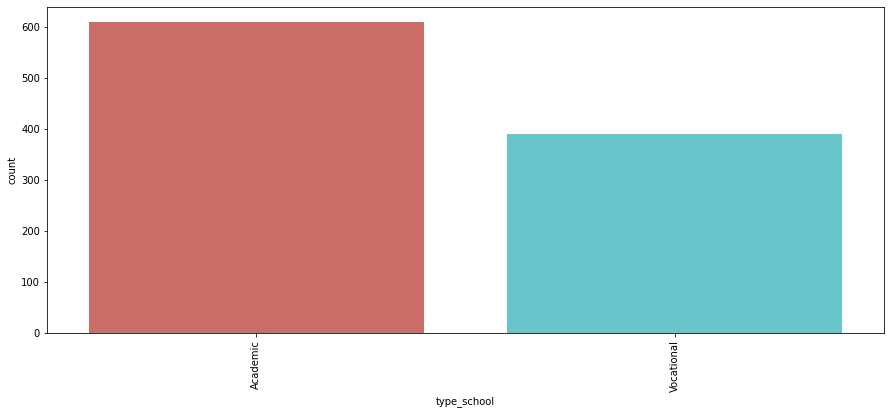

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


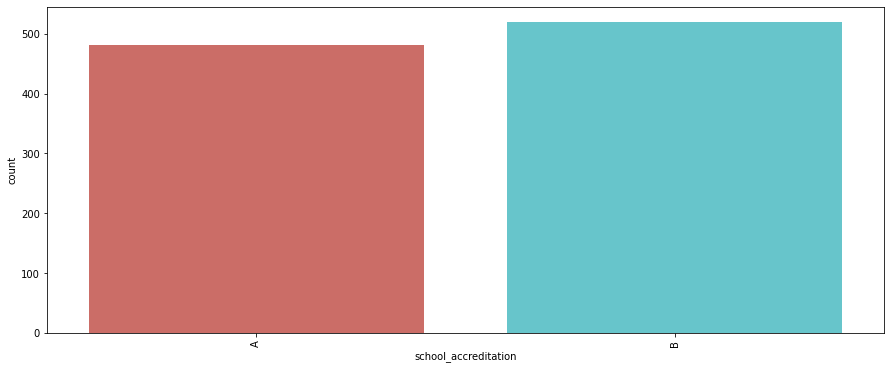

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


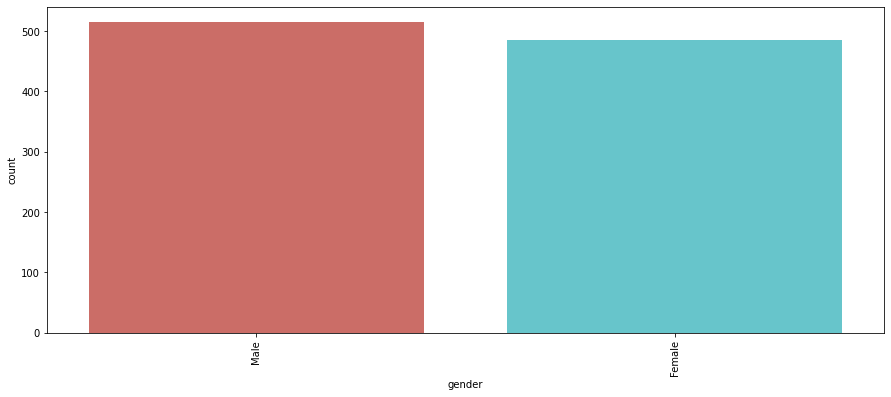

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


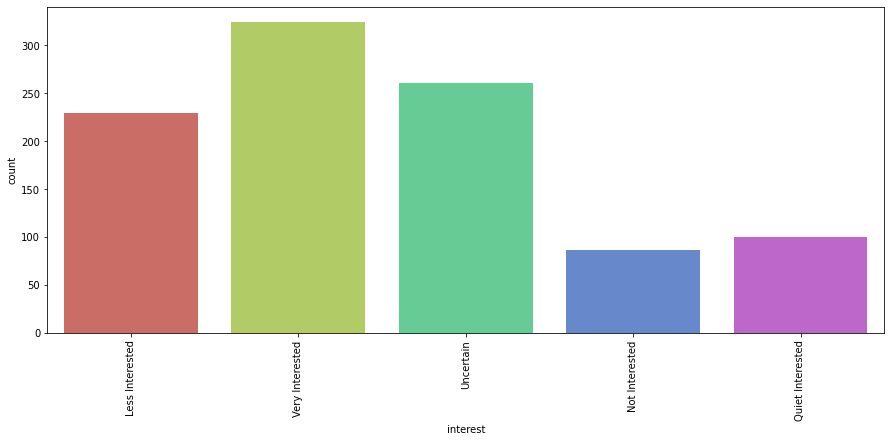

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


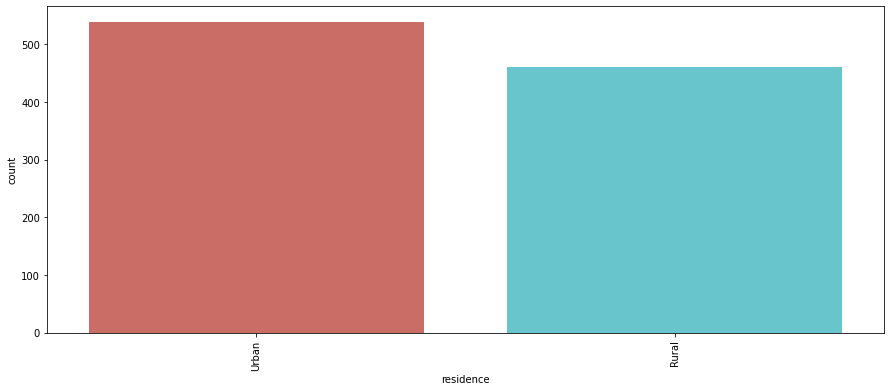

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


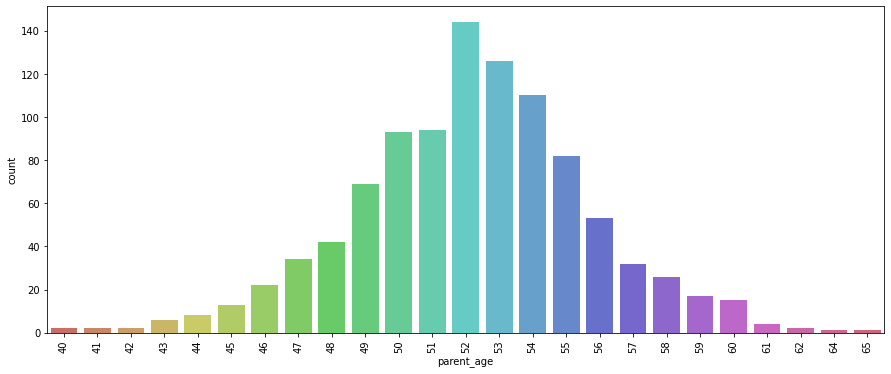

In [170]:
for i in data1.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(data1[i],data=data1,palette='hls')
  plt.xticks(rotation = 90)
  plt.show()

# Ploting Correlation

In [171]:
data.corr()

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
parent_age,1.000000,-0.286418,0.107060,-0.006077,-0.438322,0.042873
parent_salary,-0.286418,1.000000,0.138357,0.306712,0.106487,0.475693
house_area,0.107060,0.138357,1.000000,0.409565,0.145186,0.467267
average_grades,-0.006077,0.306712,0.409565,1.000000,0.236713,0.505133
parent_was_in_college,-0.438322,0.106487,0.145186,0.236713,1.000000,0.048038
in_college,0.042873,0.475693,0.467267,0.505133,0.048038,1.000000


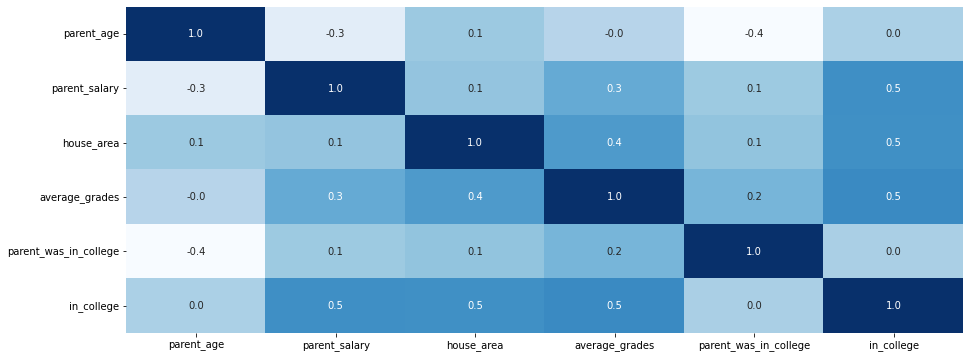

In [172]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cbar=False,cmap='Blues',fmt='.1f')
plt.show()

# Encoding Binary Columns(To -> 0,1) And Object Columns(To -> int[0:5])

In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type_school'] = le.fit_transform(data['type_school'])
data['school_accreditation'] = le.fit_transform(data['school_accreditation'])
data['gender'] = le.fit_transform(data['gender'])
data['interest']=data['interest'].map({'Very Interested': 0,'Uncertain': 1,'Less Interested':2,'Quiet Interested':3, 'Not Interested':4})
data['residence'] = le.fit_transform(data['residence'])
data["parent_was_in_college"] = data["parent_was_in_college"].astype(int)
data["in_college"] = data["in_college"].astype(int)
data

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0,0,1,2,1,56,6950000,83.0,84.09,0,1
1,0,0,1,2,1,57,4410000,76.8,86.91,0,1
2,0,1,0,0,1,50,6500000,80.6,87.43,0,1
3,1,1,1,0,0,49,6600000,78.2,82.12,1,1
4,0,0,0,0,1,57,5250000,75.1,86.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,49,7420000,63.6,85.99,1,1
996,0,1,0,2,0,51,7480000,84.3,89.72,1,1
997,1,0,1,2,1,49,5550000,75.2,79.56,0,1
998,0,1,1,1,0,53,5840000,105.8,87.18,1,1


# Dividing Data into - [feature, Target]

In [175]:
x = data.drop(['in_college'], axis=1)
y = data['in_college']

# Feature Scaling

In [176]:
# Scaling the data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=x.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=x.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,-7.612958e-17,-4.060244e-17,-8.881784e-18,-4.948423e-17,-4.821540e-17,1.015061e-17,-1.015061e-16,5.633589e-16,-1.294203e-15,-2.791418e-17
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00
min,-7.734168e-01,-1.064963e+00,-1.034894e+00,-1.095262e+00,-1.080362e+00,-3.590022e+00,-2.581060e+00,-3.568543e+00,-3.067962e+00,-1.058873e+00
25%,-7.734168e-01,-1.064963e+00,-1.034894e+00,-1.095262e+00,-1.080362e+00,-6.297022e-01,-7.068905e-01,-6.431573e-01,-6.986463e-01,-1.058873e+00
50%,-7.734168e-01,9.389997e-01,9.662824e-01,-2.924522e-01,9.256154e-01,-3.763835e-02,1.367089e-02,7.544502e-02,-1.652402e-01,9.444003e-01
75%,1.292964e+00,9.389997e-01,9.662824e-01,5.103577e-01,9.256154e-01,5.544255e-01,7.058358e-01,6.740062e-01,6.374229e-01,9.444003e-01
max,1.292964e+00,9.389997e-01,9.662824e-01,2.115977e+00,9.256154e-01,3.810777e+00,3.261521e+00,2.982742e+00,3.172379e+00,9.444003e-01



                                          Standardardization on Testing set                                          


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.115127,-0.083021,-0.014294,-0.003441,0.002866,0.079788,-0.057202,-0.030191,-0.033010,-0.057236
std,1.024724,1.003455,1.002060,1.047580,1.001445,1.114482,0.972294,1.019378,0.952633,1.003310
min,-0.773417,-1.064963,-1.034894,-1.095262,-1.080362,-3.590022,-3.127693,-3.594853,-3.248926,-1.058873
25%,-0.773417,-1.064963,-1.034894,-1.095262,-1.080362,-0.629702,-0.836450,-0.682623,-0.685512,-1.058873
50%,-0.773417,-1.064963,0.966282,-0.292452,0.925615,0.258394,0.081113,0.026113,-0.149187,-0.057236
75%,1.292964,0.939000,0.966282,0.510358,0.925615,0.850457,0.641944,0.662495,0.573940,0.944400
max,1.292964,0.939000,0.966282,2.115977,0.925615,2.922681,2.232148,2.739371,3.464257,0.944400


# Creating Evaluation Function For Evaluation Of All Classification Algo's

In [188]:
from sklearn.metrics import r2_score, log_loss
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,6]), columns=['Train-R2','Test-R2','Train-Accuracy','Test-Accuracy','Train-CrossEnt','Test-CrossEnt'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
def Evaluate(n, pred1, pred2, score1, score2, lables):
    #Plotting predicted predicteds alongside the actual datapoints
    print('\nThe Training accuracy score of This Algo is {:03.2f}\n'.format(score1))
    print('\nThe Testing accuracy score of This Algo is {:03.2f}\n'.format(score2))
    print("Training Classification Report:\n", classification_report(y_train, pred1))
    print("Testing Classification Report:\n", classification_report(y_test, pred2))
    print("The Confusion Matrises (Training):\n",confusion_matrix(y_train, pred1))
    print("The Confusion Matrises (Testing):\n",confusion_matrix(y_test, pred2))
    cm1 = confusion_matrix(y_train, pred1, labels=lables)
    cm2 = confusion_matrix(y_test, pred2, labels=lables)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=lables)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=lables)
    disp1.plot()
    plt.title("Training")
    plt.show()
    disp2.plot()
    plt.title("Testing")
    plt.show()

    #Evaluating the Classification Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(y_train, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train-pred1)),20))
    print('Cross Entropy (CE) on Training set      --->',round(log_loss(y_train, pred1),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(y_test, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_test-pred2)),20))
    print('Cross Entropy (CE) on Training set       --->',round(log_loss(y_test, pred2),20))
    print('\n{}{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-Accuracy'] = round(score1,20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-Accuracy']  = round(score2,20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-CrossEnt'] = round(log_loss(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-CrossEnt']  = round(log_loss(y_test, pred2),20)


# 0 : Logistic Regression


The Training accuracy score of This Algo is 0.86


The Testing accuracy score of This Algo is 0.85

Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       349
           1       0.86      0.87      0.86       351

    accuracy                           0.86       700
   macro avg       0.86      0.86      0.86       700
weighted avg       0.86      0.86      0.86       700

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       151
           1       0.85      0.86      0.85       149

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

The Confusion Matrises (Training):
 [[299  50]
 [ 47 304]]
The Confusion Matrises (Testing):
 [[128  23]
 [ 21 128]]


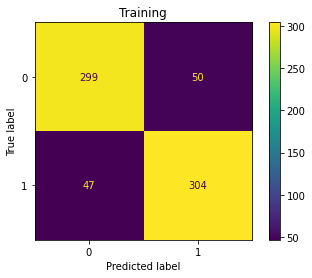

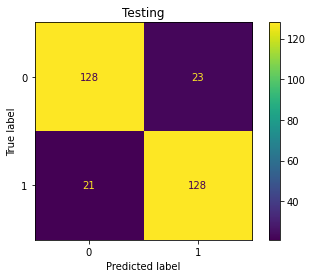



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4457097608960074
Residual Sum of Squares (RSS) on Training set  ---> 97
Cross Entropy (CE) on Training set      ---> 4.7861447002540665

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.41330725810036006
Residual Sum of Squares (RSS) on Training set  ---> 44
Cross Entropy (CE) on Training set       ---> 5.065748507056549

----------------------------------------


In [189]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(Train_X_std, y_train)
pred1 = LR.predict(Train_X_std)
pred2 = LR.predict(Test_X_std)
score1 = LR.score(Train_X_std,y_train)
score2 = LR.score(Test_X_std,y_test)
labels = LR.classes_
Evaluate(0,pred1,pred2,score1,score2,labels)

# 1 : Decision Tree Classifier


The Training accuracy score of This Algo is 1.00


The Testing accuracy score of This Algo is 0.79

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       351

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.80      0.79      0.79       149

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

The Confusion Matrises (Training):
 [[349   0]
 [  0 351]]
The Confusion Matrises (Testing):
 [[121  30]
 [ 32 117]]


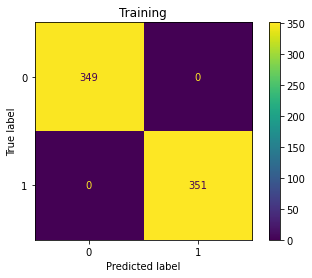

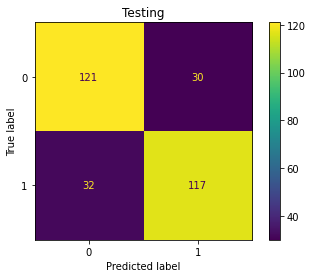



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0
Cross Entropy (CE) on Training set      ---> 9.992e-16

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.17329659095959826
Residual Sum of Squares (RSS) on Training set  ---> 62
Cross Entropy (CE) on Training set       ---> 7.138093748024559

----------------------------------------


In [190]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(Train_X_std, y_train)
pred1 = DTC.predict(Train_X_std)
pred2 = DTC.predict(Test_X_std)
score1 = DTC.score(Train_X_std,y_train)
score2 = DTC.score(Test_X_std,y_test)
labels = DTC.classes_
Evaluate(1,pred1,pred2,score1,score2,labels)

# 2 : Random Forest Classifier


The Training accuracy score of This Algo is 1.00


The Testing accuracy score of This Algo is 0.85

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       351

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       151
           1       0.88      0.81      0.84       149

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

The Confusion Matrises (Training):
 [[349   0]
 [  0 351]]
The Confusion Matrises (Testing):
 [[135  16]
 [ 29 120]]


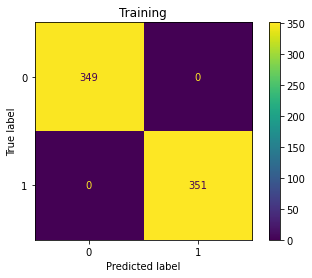

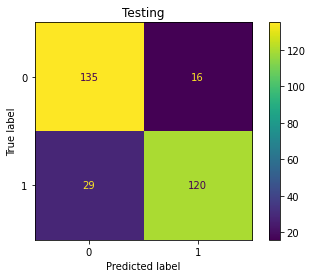



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0
Cross Entropy (CE) on Training set      ---> 9.992e-16

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.3999733321480955
Residual Sum of Squares (RSS) on Training set  ---> 45
Cross Entropy (CE) on Training set       ---> 5.18085910443288

----------------------------------------


In [191]:
# Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(Train_X_std, y_train)
pred1 = RFC.predict(Train_X_std)
pred2 = RFC.predict(Test_X_std)
score1 = RFC.score(Train_X_std,y_train)
score2 = RFC.score(Test_X_std,y_test)
labels = RFC.classes_
Evaluate(2,pred1,pred2,score1,score2,labels)

# 3 : Support Vector Classifier


The Training accuracy score of This Algo is 0.93


The Testing accuracy score of This Algo is 0.88

Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       349
           1       0.93      0.93      0.93       351

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       151
           1       0.90      0.85      0.87       149

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

The Confusion Matrises (Training):
 [[325  24]
 [ 24 327]]
The Confusion Matrises (Testing):
 [[137  14]
 [ 23 126]]


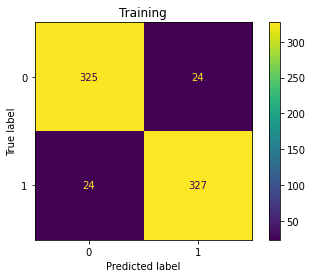

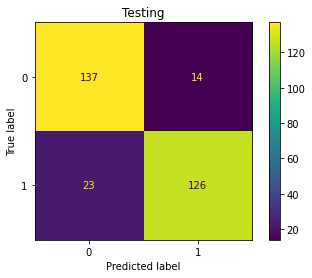



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7257120466289522
Residual Sum of Squares (RSS) on Training set  ---> 48
Cross Entropy (CE) on Training set      ---> 2.368400653277197

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.5066447397662118
Residual Sum of Squares (RSS) on Training set  ---> 37
Cross Entropy (CE) on Training set       ---> 4.259819736585727

----------------------------------------


In [ ]:
# Support Vector Classifier
svc = SVC()
svc.fit(Train_X_std, y_train)
pred1 = svc.predict(Train_X_std)
pred2 = svc.predict(Test_X_std)
score1 = svc.score(Train_X_std,y_train)
score2 = svc.score(Test_X_std,y_test)
labels = svc.classes_
Evaluate(3,pred1,pred2,score1,score2,labels)

# 4 : K Neighbors Classifier


The Training accuracy score of This Algo is 0.91


The Testing accuracy score of This Algo is 0.86

Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       349
           1       0.92      0.89      0.91       351

    accuracy                           0.91       700
   macro avg       0.91      0.91      0.91       700
weighted avg       0.91      0.91      0.91       700

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.88      0.84      0.86       149

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

The Confusion Matrises (Training):
 [[321  28]
 [ 37 314]]
The Confusion Matrises (Testing):
 [[134  17]
 [ 24 125]]


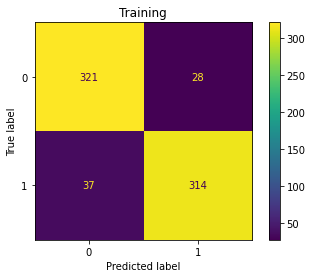

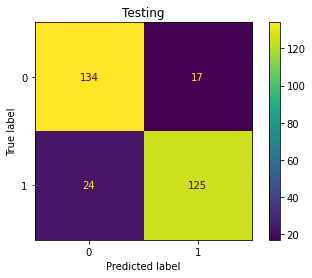



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6285683964767059
Residual Sum of Squares (RSS) on Training set  ---> 65
Cross Entropy (CE) on Training set      ---> 3.2072040777103434

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.4533090359571536
Residual Sum of Squares (RSS) on Training set  ---> 41
Cross Entropy (CE) on Training set       ---> 4.720344751158838

----------------------------------------


In [193]:
# K Neighbors Classifier
KNC = KNeighborsClassifier()
KNC.fit(Train_X_std, y_train)
pred1 = KNC.predict(Train_X_std)
pred2 = KNC.predict(Test_X_std)
score1 = KNC.score(Train_X_std,y_train)
score2 = KNC.score(Test_X_std,y_test)
labels = KNC.classes_
Evaluate(4,pred1,pred2,score1,score2,labels)

# 

# **✔ *Final Evaluation* Of All *Classification Algorithms***

In [194]:
# Classification Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Logistic Regression (LR)','Decision Tree Classifier(DTC)','Random Forest Classifier (RFC)','Support Vector Classifier (SVC)','K Neighbors Classifier (KNC)']
EMC

,Train-R2,Test-R2,Train-Accuracy,Test-Accuracy,Train-CrossEnt,Test-CrossEnt
Logistic Regression (LR),0.445710,0.413307,0.861429,0.853333,4.786145e+00,5.065749
Decision Tree Classifier(DTC),1.000000,0.173297,1.000000,0.793333,9.992000e-16,7.138094
Random Forest Classifier (RFC),1.000000,0.399973,1.000000,0.850000,9.992000e-16,5.180859
Support Vector Classifier (SVC),0.725712,0.506645,0.931429,0.876667,2.368401e+00,4.259820
K Neighbors Classifier (KNC),0.628568,0.453309,0.907143,0.863333,3.207204e+00,4.720345


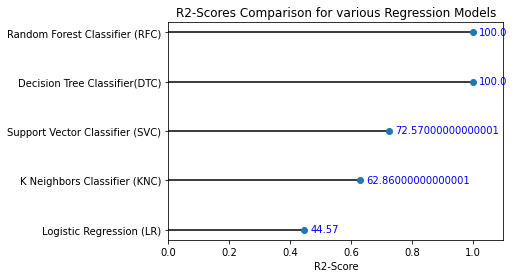

In [195]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

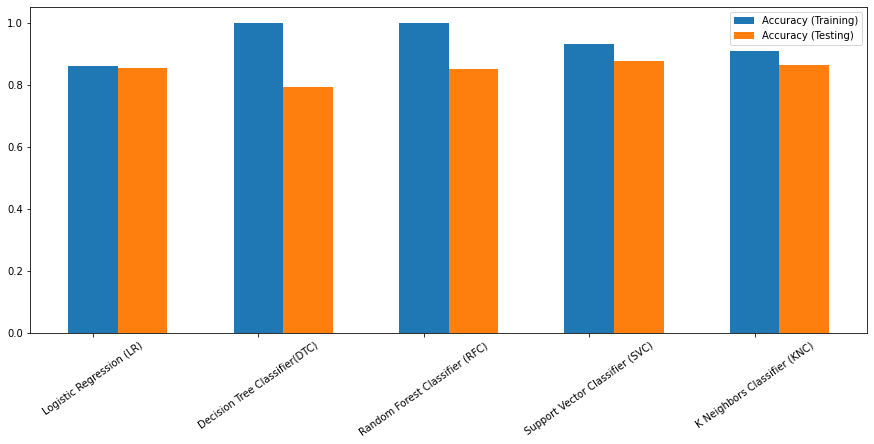

In [196]:
# Cross Entropy Error Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.figure(figsize=[15,6])
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[2]].values, width=0.3, label='Accuracy (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[3]].values, width=0.3, label='Accuracy (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.show()

# Conclusion:
Higher the Accuracy, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that DTC And RFC clearly overfitting the current problem. Surprisingly simple Support Vector Classifier(SVC) Or K Neighbors Classifier(KNC) gave the best results.